# **Compare Actual Inventory**

- Descriptive Analytics : สำรวจสถานการณ์ว่าเกิดอะไรขึ้นในปี 2024 จากการดำเนินงานตาม model ที่ทำนาย Inventory และ Outbound

## Import Library

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **CHINA-WAREHOUSE**

### Data Cleaning

In [221]:
df_inventory_cn = pd.read_excel('clean/Cleaned_Inventory_China.xlsx')
df_inventory_cn = df_inventory_cn.drop(columns=['UNRESRICTED_STOCK', 'STOCK_UNIT'])
df_inventory_cn.rename(columns={'UNRESRICTED_STOCK_MT': 'UNRESTRICTED_STOCK_MT'}, inplace=True)
df_inventory_cn

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,STOCK_SELL_VALUE,CURRENCY,UNRESTRICTED_STOCK_MT
0,2023-12-31,CHINA-WAREHOUSE,MAT-0045,SCRAP,211,CNY,0.164
1,2023-12-31,CHINA-WAREHOUSE,MAT-0117,A1342A,3312,CNY,0.350
2,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A4085A,287100,CNY,22.500
3,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A2741A,287100,CNY,22.500
4,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A8721A,287100,CNY,22.500
...,...,...,...,...,...,...,...
15505,2024-12-31,CHINA-WAREHOUSE,MAT-0332,7882A,73238,CNY,78.750
15506,2024-12-31,CHINA-WAREHOUSE,MAT-0332,5069A,75563,CNY,81.250
15507,2024-12-31,CHINA-WAREHOUSE,MAT-0332,6413A,69750,CNY,75.000
15508,2024-12-31,CHINA-WAREHOUSE,MAT-0332,2227A,74400,CNY,80.000


In [161]:
#df_inventory_cn = df_inventory_cn[
    #~((df_inventory_cn['UNRESTRICTED_STOCK_MT'] == 0) & (df_inventory_cn['STOCK_SELL_VALUE'] == 0))
#]
#df_inventory_cn.reset_index(drop=True, inplace=True)
#df_inventory_cn.shape

### Check Duplications

In [236]:
df_inventory_cn.duplicated(subset=['BALANCE_AS_OF_DATE', 'MATERIAL_NAME', 'BATCH_NUMBER', 'UNRESTRICTED_STOCK_MT', 'STOCK_SELL_VALUE']).sum()

0

> พบรายการ สินค้าที่คิดว่าน่าจะเป็น Duplicated พิจารณาตัดออก

In [237]:
df_inventory_cn = df_inventory_cn.drop_duplicates(subset=[
    'BALANCE_AS_OF_DATE', 'MATERIAL_NAME', 'BATCH_NUMBER', 'UNRESTRICTED_STOCK_MT', 'STOCK_SELL_VALUE'])
df_inventory_cn.shape

(15505, 7)

In [238]:
monthly_stock_cn = df_inventory_cn.groupby(df_inventory_cn['BALANCE_AS_OF_DATE'].dt.to_period('M'))['UNRESTRICTED_STOCK_MT'].sum().reset_index()
#monthly_inbound_cn['INBOUND_DATE'] = monthly_inbound_cn['INBOUND_DATE'].dt.to_timestamp()
monthly_stock_cn

,BALANCE_AS_OF_DATE,UNRESTRICTED_STOCK_MT
0,2023-12,42230.173
1,2024-01,39023.693
2,2024-02,46217.648
3,2024-03,48478.708
4,2024-04,48415.015
5,2024-05,52826.486
6,2024-06,72524.391
7,2024-07,76136.124
8,2024-08,68138.683
9,2024-09,66701.368


> จำนวนสินค้าคงคลังรวม ณ สิ้นเดือนที่เกิดขึ้นจริงจากตาราง inventory แต่ยังไม่แน่ใจเนื่องจากในตารางนั้น ยังมีข้อมูลบางส่วนที่ไม่สามารถ clean ได้จริง ไม่อิงว่า inventory ที่ได้มาจะเป็นสินค้าคงคลังสุทธิ จริงที่เกิดขึ้น ณ เดือนนั้น

In [239]:
df_inbound_cn = pd.read_excel('clean/Cleaned_Inbound_China.xlsx')
df_inbound_cn

,INBOUND_DATE,PLANT_NAME,MATERIAL_NAME,NET_QUANTITY_MT
0,2023-11-03,CHINA-WAREHOUSE,MAT-0237,24.75
1,2023-11-03,CHINA-WAREHOUSE,MAT-0237,24.75
2,2023-11-03,CHINA-WAREHOUSE,MAT-0237,24.75
3,2023-11-03,CHINA-WAREHOUSE,MAT-0237,24.75
4,2023-11-03,CHINA-WAREHOUSE,MAT-0237,24.75
...,...,...,...,...
13364,2024-12-24,CHINA-WAREHOUSE,MAT-0265,24.75
13365,2024-12-24,CHINA-WAREHOUSE,MAT-0265,24.75
13366,2024-12-24,CHINA-WAREHOUSE,MAT-0118,24.75
13367,2024-12-24,CHINA-WAREHOUSE,MAT-0232,24.75


In [240]:
monthly_inbound_cn = df_inbound_cn.groupby(df_inbound_cn['INBOUND_DATE'].dt.to_period('M'))['NET_QUANTITY_MT'].sum().reset_index()
#monthly_inbound_cn['INBOUND_DATE'] = monthly_inbound_cn['INBOUND_DATE'].dt.to_timestamp()
monthly_inbound_cn

,INBOUND_DATE,NET_QUANTITY_MT
0,2023-11,2307.880
1,2023-12,12867.525
2,2024-01,25025.125
3,2024-02,16469.113
4,2024-03,33598.812
5,2024-04,23836.500
6,2024-05,29770.405
7,2024-06,20254.925
8,2024-07,23471.777
9,2024-08,23469.684


> จำนวนสินค้าที่นำเข้ามาในคลังในแต่ละเดือน 

In [241]:
df_outbound_cn = pd.read_excel('clean/Cleaned_Outbound_China.xlsx')
df_outbound_cn

,OUTBOUND_DATE,PLANT_NAME,MODE_OF_TRANSPORT,MATERIAL_NAME,CUSTOMER_NUMBER,NET_QUANTITY_MT
0,2024-01-02,CHINA-WAREHOUSE,Truck,MAT-0007,CST-00023,4.13
1,2024-01-02,CHINA-WAREHOUSE,Truck,MAT-0007,CST-00023,19.25
2,2024-01-02,CHINA-WAREHOUSE,Truck,MAT-0007,CST-00023,1.38
3,2024-01-02,CHINA-WAREHOUSE,Truck,MAT-0013,CST-00001,25.50
4,2024-01-02,CHINA-WAREHOUSE,Truck,MAT-0013,CST-00001,25.50
...,...,...,...,...,...,...
18168,2024-12-31,CHINA-WAREHOUSE,Truck,MAT-0428,CST-00120,24.75
18169,2024-12-31,CHINA-WAREHOUSE,Truck,MAT-0428,CST-00120,0.08
18170,2024-12-31,CHINA-WAREHOUSE,Truck,MAT-0428,CST-00120,13.68
18171,2024-12-31,CHINA-WAREHOUSE,Truck,MAT-0428,CST-00120,11.00


In [242]:
monthly_outbound_cn = df_outbound_cn.groupby(df_outbound_cn['OUTBOUND_DATE'].dt.to_period('M'))['NET_QUANTITY_MT'].sum().reset_index()
#monthly_inbound_cn['INBOUND_DATE'] = monthly_inbound_cn['INBOUND_DATE'].dt.to_timestamp()
monthly_outbound_cn

,OUTBOUND_DATE,NET_QUANTITY_MT
0,2024-01,25687.77
1,2024-02,14025.65
2,2024-03,20438.56
3,2024-04,21062.60
4,2024-05,22762.81
5,2024-06,21010.19
6,2024-07,21824.08
7,2024-08,20744.91
8,2024-09,26569.43
9,2024-10,23404.13


> จำนวนสินค้าที่ส่งออกให้ลูกค้าต่อเดือน

In [243]:
inbound_df = df_inbound_cn.copy()
outbound_df = df_outbound_cn.copy()
inventory_df = df_inventory_cn.copy()

# rename columns for clarity
inbound_df = inbound_df.rename(columns={"INBOUND_DATE": "DATE", "NET_QUANTITY_MT": "INBOUND_MT"})
outbound_df = outbound_df.rename(columns={"OUTBOUND_DATE": "DATE", "NET_QUANTITY_MT": "OUTBOUND_MT"})
inventory_df = inventory_df.rename(columns={"BALANCE_AS_OF_DATE": "DATE", "UNRESRICTED_STOCK_MT": "UNRESTRICTED_STOCK_MT"})

# แปลงวันที่และเพิ่มคอลัมน์ MONTH
for df in [inbound_df, inventory_df, outbound_df]:
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['MONTH'] = df['DATE'].dt.to_period('M')

# รวมข้อมูลตาม MATERIAL_NAME และ MONTH
monthly_inbound = inbound_df.groupby(['MATERIAL_NAME', 'MONTH'])['INBOUND_MT'].sum().reset_index()
monthly_outbound = outbound_df.groupby(['MATERIAL_NAME', 'MONTH'])['OUTBOUND_MT'].sum().reset_index()
monthly_inventory = inventory_df.groupby(['MATERIAL_NAME', 'MONTH'])['UNRESTRICTED_STOCK_MT'].sum().reset_index()
monthly_inventory = monthly_inventory.rename(columns={"UNRESTRICTED_STOCK_MT": "ACTUAL_INVENTORY"})

# รวมข้อมูลทั้งหมด
df_merged = pd.merge(monthly_inventory, monthly_inbound, how="outer", on=["MATERIAL_NAME", "MONTH"])
df_merged = pd.merge(df_merged, monthly_outbound, how="outer", on=["MATERIAL_NAME", "MONTH"])
df_merged = df_merged.sort_values(by=["MATERIAL_NAME", "MONTH"])
df_merged[['ACTUAL_INVENTORY', 'INBOUND_MT', 'OUTBOUND_MT']] = df_merged[['ACTUAL_INVENTORY', 'INBOUND_MT', 'OUTBOUND_MT']].fillna(0)

# Initialize the forecast and previous inventory columns
df_merged['CAL_INVENTORY'] = 0.0
df_merged['INVENTORY_LAST_MONTH'] = 0.0

materials = df_merged['MATERIAL_NAME'].unique()
result_rows = []

for material in materials:
    material_data = df_merged[df_merged['MATERIAL_NAME'] == material].copy()
    material_data = material_data.sort_values('MONTH')

    last_inventory = 0.0
    for i, row in material_data.iterrows():
        current_row = row.copy()
        if row['MONTH'] == pd.Period('2023-12'):
            forecast = row['ACTUAL_INVENTORY']
        else:
            forecast = last_inventory + row['INBOUND_MT'] - row['OUTBOUND_MT']

        current_row['INVENTORY_LAST_MONTH'] = last_inventory
        current_row['CAL_INVENTORY'] = forecast

        # update last_inventory to actual always
        last_inventory = forecast
        result_rows.append(current_row)

df_result = pd.DataFrame(result_rows)

# เปรียบเทียบ actual inventory และ forecast inventory พร้อมแสดงค่าความต่าง (บวกลบ)
df_result['INVENTORY_DIFF'] = df_result['CAL_INVENTORY'] - df_result['ACTUAL_INVENTORY']
df_result = df_result[['MATERIAL_NAME', 'MONTH', 'INVENTORY_LAST_MONTH', 'INBOUND_MT', 'OUTBOUND_MT', 'CAL_INVENTORY', 'ACTUAL_INVENTORY', 'INVENTORY_DIFF']]
df_result

,MATERIAL_NAME,MONTH,INVENTORY_LAST_MONTH,INBOUND_MT,OUTBOUND_MT,CAL_INVENTORY,ACTUAL_INVENTORY,INVENTORY_DIFF
0,MAT-0001,2023-12,0.000,0.000,0.00,1927.525,1927.525,0.000
1,MAT-0001,2024-01,1927.525,1708.500,1409.81,2226.215,2225.625,0.590
2,MAT-0001,2024-02,2226.215,0.000,381.87,1844.345,1843.725,0.620
3,MAT-0001,2024-03,1844.345,739.500,679.79,1904.055,1393.300,510.755
4,MAT-0001,2024-04,1904.055,255.000,834.10,1324.955,1328.500,-3.545
...,...,...,...,...,...,...,...,...
2982,MAT-0430,2024-08,46.420,0.000,1.68,44.740,65.375,-20.635
2983,MAT-0430,2024-09,44.740,4.125,4.48,44.385,60.900,-16.515
2984,MAT-0430,2024-10,44.385,271.850,0.36,315.875,60.550,255.325
2985,MAT-0430,2024-11,315.875,0.000,80.27,235.605,58.450,177.155


> merge dataframe เพื่อดูการไหลของสินค้า

In [244]:
#Compare by month
forecast_by_month = df_result.groupby('MONTH').agg({
    'INBOUND_MT': 'sum',
    'OUTBOUND_MT': 'sum',
    'CAL_INVENTORY': 'sum',
    'ACTUAL_INVENTORY': 'sum',
    'INVENTORY_DIFF': 'sum'
}).reset_index()
forecast_by_month

,MONTH,INBOUND_MT,OUTBOUND_MT,CAL_INVENTORY,ACTUAL_INVENTORY,INVENTORY_DIFF
0,2023-11,2307.880,0.00,2307.880,0.000,2307.880
1,2023-12,12867.525,0.00,42230.173,42230.173,0.000
2,2024-01,25025.125,25687.77,41557.553,39023.693,2533.860
3,2024-02,16469.113,14025.65,43764.081,46217.648,-2453.567
4,2024-03,33598.812,20438.56,57007.483,48478.708,8528.775
5,2024-04,23836.500,21062.60,59312.737,48415.015,10897.722
6,2024-05,29770.405,22762.81,66690.168,52826.486,13863.682
7,2024-06,20254.925,21010.19,66011.793,72524.391,-6512.598
8,2024-07,23471.777,21824.08,67664.750,76136.124,-8471.374
9,2024-08,23469.684,20744.91,70512.064,68138.683,2373.381


> Refer **forcast_by_month = inventory** ที่เกิดขึ้นจริง เพราะคำนวณตามตาราง inbound, outbound

- ค่าจริงที่ควรเกิดขึ้น แต่พบ anomalies เช่น สินค้าหาย/ทิ้ง/ตัดบัญชี... เป็น error ได้จากหลายปัจจัย

### Compare model predicted

In [260]:
df_model_predict = pd.read_excel('clean/Clean_forecast.xlsx')
df_model_predict.drop(columns=['Total_capacity', 'Predicted_Outbound (KT)', 'Predicted_Inventory (KT)'], inplace=True)
#df_model_predict.columns

In [261]:
df_model_predict_cn = df_model_predict[df_model_predict['PLANT_NAME']== 'CHINA-WAREHOUSE']
df_model_predict_cn['Predicted_outbound_MT'] = df_model_predict_cn['Predicted_outbound_MT'].astype(float)
df_model_predict_cn['Total_capacity_MT'] = df_model_predict_cn['Total_capacity_MT'].astype(float)
df_model_predict_cn['MONTH'] = df_model_predict_cn['MM/YY'].dt.to_period('M')
df_model_predict_cn.drop(columns=['MM/YY'], inplace=True)
df_model_predict_cn

/var/folders/hb/q_224lns0mlcx0n865_2ylqc0000gn/T/ipykernel_78117/383911887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_predict_cn['Predicted_outbound_MT'] = df_model_predict_cn['Predicted_outbound_MT'].astype(float)
/var/folders/hb/q_224lns0mlcx0n865_2ylqc0000gn/T/ipykernel_78117/383911887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_predict_cn['Total_capacity_MT'] = df_model_predict_cn['Total_capacity_MT'].astype(float)
/var/folders/hb/q_224lns0mlcx0n865_2ylqc0000gn/T/ipyke

,PLANT_NAME,Total_capacity_MT,Predicted_outbound_MT,Predicted_inventory_MT,MONTH
12,CHINA-WAREHOUSE,58000.0,22600.0,40000.0,2024-01
13,CHINA-WAREHOUSE,70000.0,21700.0,37000.0,2024-02
14,CHINA-WAREHOUSE,70000.0,22000.0,35000.0,2024-03
15,CHINA-WAREHOUSE,70000.0,23100.0,36000.0,2024-04
16,CHINA-WAREHOUSE,70000.0,26700.0,36000.0,2024-05
17,CHINA-WAREHOUSE,70000.0,21900.0,41000.0,2024-06
18,CHINA-WAREHOUSE,70000.0,36200.0,44000.0,2024-07
19,CHINA-WAREHOUSE,70000.0,22900.0,42000.0,2024-08
20,CHINA-WAREHOUSE,70000.0,26400.0,42000.0,2024-09
21,CHINA-WAREHOUSE,70000.0,28600.0,42000.0,2024-10


In [262]:
df_compare_cn = pd.merge(
    forecast_by_month,
    df_model_predict_cn[['MONTH', 'Predicted_inventory_MT', 'Predicted_outbound_MT', 'Total_capacity_MT']],
    on='MONTH',
    how='outer'
)
df_compare_cn = df_compare_cn.fillna(0)
df_compare_cn

,MONTH,INBOUND_MT,OUTBOUND_MT,CAL_INVENTORY,ACTUAL_INVENTORY,INVENTORY_DIFF,Predicted_inventory_MT,Predicted_outbound_MT,Total_capacity_MT
0,2023-11,2307.880,0.00,2307.880,0.000,2307.880,0.0,0.0,0.0
1,2023-12,12867.525,0.00,42230.173,42230.173,0.000,0.0,0.0,0.0
2,2024-01,25025.125,25687.77,41557.553,39023.693,2533.860,40000.0,22600.0,58000.0
3,2024-02,16469.113,14025.65,43764.081,46217.648,-2453.567,37000.0,21700.0,70000.0
4,2024-03,33598.812,20438.56,57007.483,48478.708,8528.775,35000.0,22000.0,70000.0
5,2024-04,23836.500,21062.60,59312.737,48415.015,10897.722,36000.0,23100.0,70000.0
6,2024-05,29770.405,22762.81,66690.168,52826.486,13863.682,36000.0,26700.0,70000.0
7,2024-06,20254.925,21010.19,66011.793,72524.391,-6512.598,41000.0,21900.0,70000.0
8,2024-07,23471.777,21824.08,67664.750,76136.124,-8471.374,44000.0,36200.0,70000.0
9,2024-08,23469.684,20744.91,70512.064,68138.683,2373.381,42000.0,22900.0,70000.0


In [263]:
df_compare_cn.to_excel('compare_model_all.xlsx', index=False)

ไฟล์แสดงการเปรียบเทียบค่าที่ model ทำนายและค่าจริงที่เกิดขึ้น หากตัดสินใจตาม Model ที่ไม่แม่นยำจะเกิดอะไรขึ้น

## **EDA**

In [267]:
df_compare_cn = pd.read_excel('compare_model_all.xlsx')

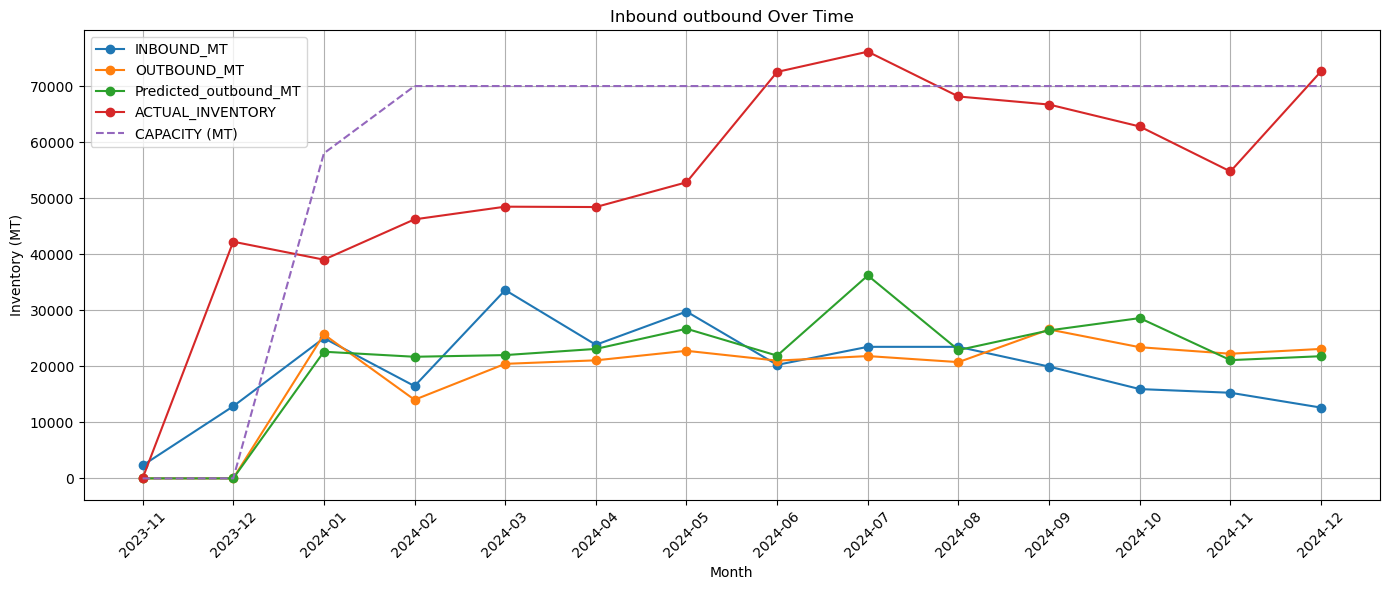

In [264]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df_compare_cn['MONTH'].astype(str), df_compare_cn['INBOUND_MT'], marker='o', label='INBOUND_MT')
plt.plot(df_compare_cn['MONTH'].astype(str), df_compare_cn['OUTBOUND_MT'], marker='o', label='OUTBOUND_MT')
plt.plot(df_compare_cn['MONTH'].astype(str), df_compare_cn['Predicted_outbound_MT'], marker='o', label='Predicted_outbound_MT')
plt.plot(df_compare_cn['MONTH'].astype(str), df_compare_cn['ACTUAL_INVENTORY'], marker='o', label='ACTUAL_INVENTORY')
#plt.plot(df_compare_cn['MONTH'].astype(str), df_compare_cn['CAL_INVENTORY'], marker='o', label='CAL_INVENTORY')
plt.plot(df_compare_cn['MONTH'].astype(str), df_compare_cn['Total_capacity_MT'], label='CAPACITY (MT)', linestyle='--')
plt.xticks(rotation=45)
plt.title("Inbound outbound Over Time")
plt.xlabel("Month")
plt.ylabel("Inventory (MT)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

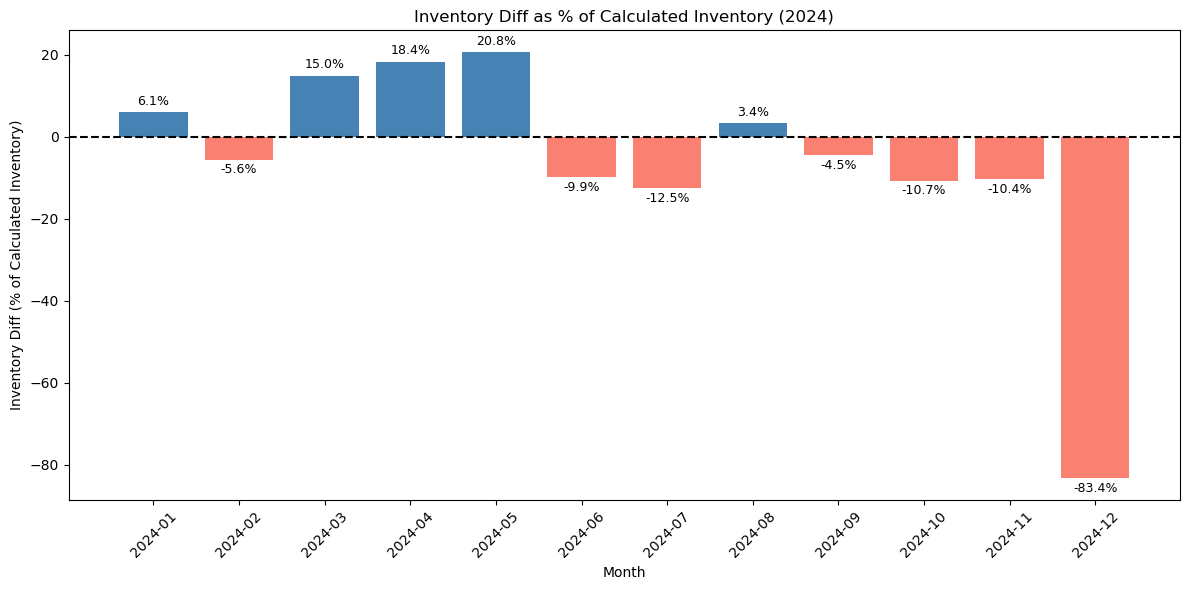

In [ ]:
# Filter 0nly 2024
df_2024_cn = df_compare_cn[df_compare_cn['MONTH'].astype(str).str.startswith('2024-')].copy()

# คำนวณ % INVENTORY_DIFF ต่อ CAL_INVENTORY
df_2024_cn['DIFF_RATIO_PERCENT'] = (df_2024_cn['INVENTORY_DIFF'] / df_2024_cn['CAL_INVENTORY']) * 100


plt.figure(figsize=(12, 6))
bars = plt.bar(
    df_2024_cn['MONTH'].astype(str),
    df_2024_cn['DIFF_RATIO_PERCENT'],
    color=df_2024_cn['DIFF_RATIO_PERCENT'].apply(lambda x: 'salmon' if x < 0 else 'steelblue')
)
plt.axhline(0, color='black', linestyle='--')
plt.title("Inventory Diff as % of Calculated Inventory (2024)")
plt.xlabel("Month")
plt.ylabel("Inventory Diff (% of Calculated Inventory)")
plt.xticks(rotation=45)
plt.tight_layout()


for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3 if height >= 0 else -12),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.show()

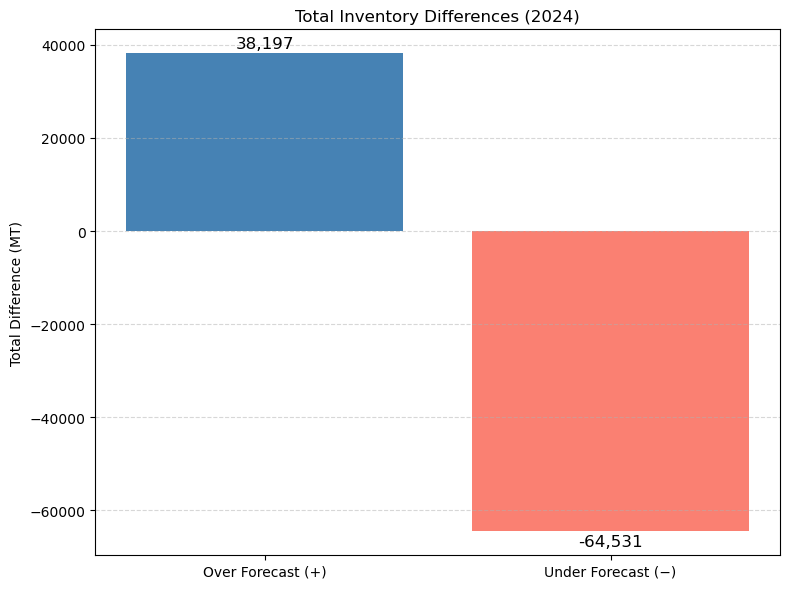

In [252]:
import matplotlib.pyplot as plt

# กรองเฉพาะเดือนปี 2024
df_2024 = df_compare_cn[df_compare_cn['MONTH'].astype(str).str.startswith('2024-')].copy()

# คำนวณยอดรวมของ diff ที่เป็นบวกและลบ
total_positive_diff = df_2024[df_2024['INVENTORY_DIFF'] > 0]['INVENTORY_DIFF'].sum()
total_negative_diff = df_2024[df_2024['INVENTORY_DIFF'] < 0]['INVENTORY_DIFF'].sum()

# เตรียมข้อมูลสำหรับ plot
labels = ['Over Forecast (+)', 'Under Forecast (−)']
values = [total_positive_diff, total_negative_diff]

# สร้างกราฟ
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['steelblue', 'salmon'])

# แสดงตัวเลขบนแท่ง
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (500 if yval > 0 else -500), f'{yval:,.0f}', 
             ha='center', va='bottom' if yval > 0 else 'top', fontsize=12)

plt.title("Total Inventory Differences (2024)")
plt.ylabel("Total Difference (MT)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

	•	Over Forecast (+): คำนวณว่าน่าจะเหลือเยอะ แต่ของจริงเหลือน้อย → ของ “หายไป” หรือ “เคลื่อนย้าย”
	•	Under Forecast (−): เราควรจะเหลือน้อยกว่านี้ แต่ของจริงกลับมากกว่า
	•	แสดงว่า:
	•	ของ ไม่ได้ส่งออกตามแผน
	•	มีของ ตกค้าง
	•	ระบบ transaction อาจ ไม่อัปเดต outbound ครบถ้วน

🟡 นี่คือ “สินค้าค้างสต็อก” และ “ความไม่มีประสิทธิภาพ” ของระบบหรือแผน

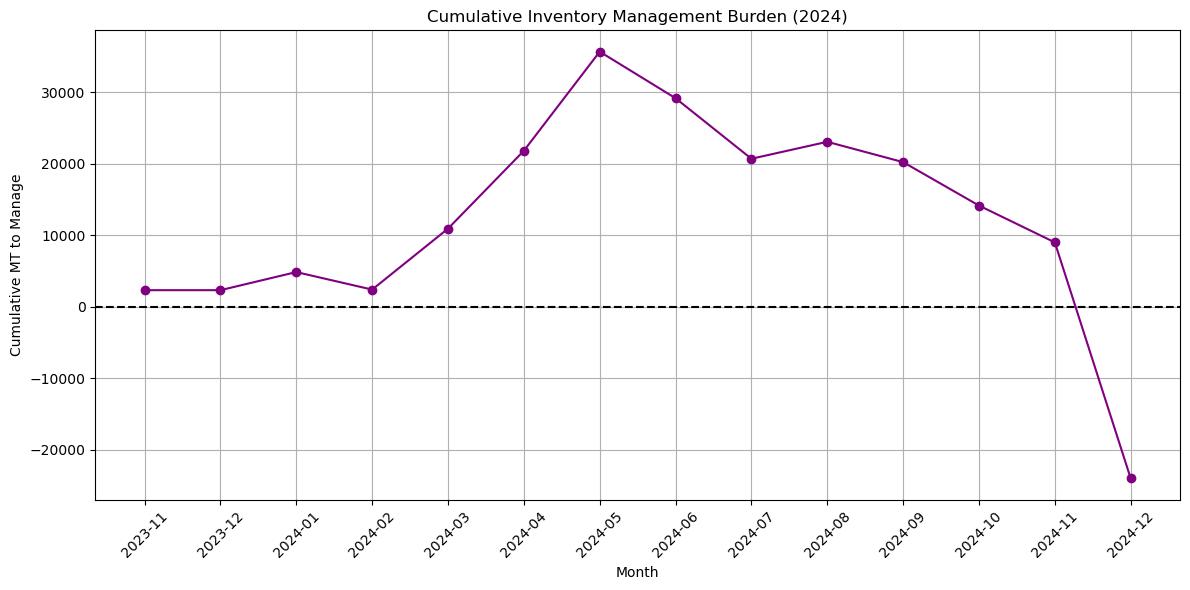

In [253]:
df_compare_cn['CUMULATIVE_DIFF'] = df_compare_cn['INVENTORY_DIFF'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(df_compare_cn['MONTH'].astype(str), df_compare_cn['CUMULATIVE_DIFF'], marker='o', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title("Cumulative Inventory Management Burden (2024)")
plt.xlabel("Month")
plt.ylabel("Cumulative MT to Manage")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Line Chart สะสมภาระงาน (Cumulative Inventory Burden)

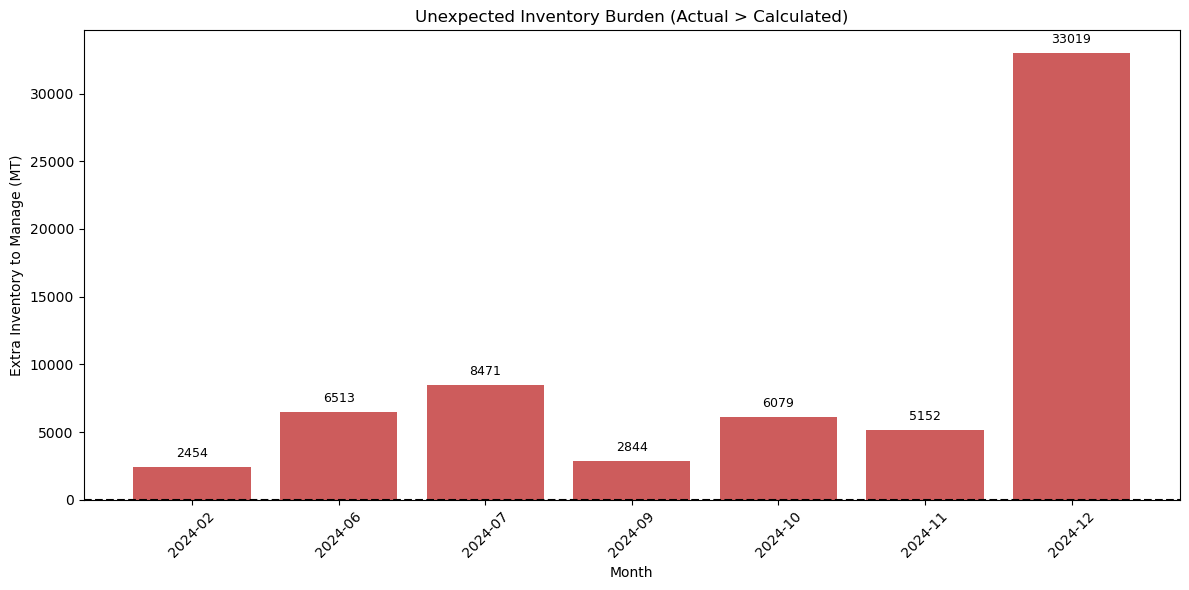

In [254]:
import matplotlib.pyplot as plt

# กรองเฉพาะเดือนที่ inventory เหลือจริง > ที่คำนวณไว้ (ลำบาก)
df_burden = df_compare_cn[df_compare_cn['INVENTORY_DIFF'] < 0].copy()
df_burden['BURDEN_MT'] = df_burden['ACTUAL_INVENTORY'] - df_burden['CAL_INVENTORY']

plt.figure(figsize=(12, 6))
bars = plt.bar(
    df_burden['MONTH'].astype(str),
    df_burden['BURDEN_MT'],
    color='indianred'
)
plt.title("Unexpected Inventory Burden (Actual > Calculated)")
plt.xlabel("Month")
plt.ylabel("Extra Inventory to Manage (MT)")
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()

# เพิ่มค่า MT บน bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.show()

	> งานหนักช่วงไหน
    •	ค่าบวก = มีสินค้าค้างในคลังมากกว่าที่ควรจะเป็น → พนักงานต้องจัดการสินค้าที่เกิน
	•	ค่าลบ = สินค้าจริงมากกว่าที่ควรจะเป็น → อาจเกิดจากการสูญเสีย/ล้นคลัง/จัดการได้ดีเกินเป้า

In [255]:
# คำนวณ INVENTORY_OVERLOAD
df_compare_cn['INVENTORY_OVERLOAD'] = df_compare_cn['ACTUAL_INVENTORY'] - df_compare_cn['Total_capacity_MT']
df_compare_cn['INVENTORY_OVERLOAD'] = df_compare_cn['INVENTORY_OVERLOAD'].apply(lambda x: x if x > 0 else 0)

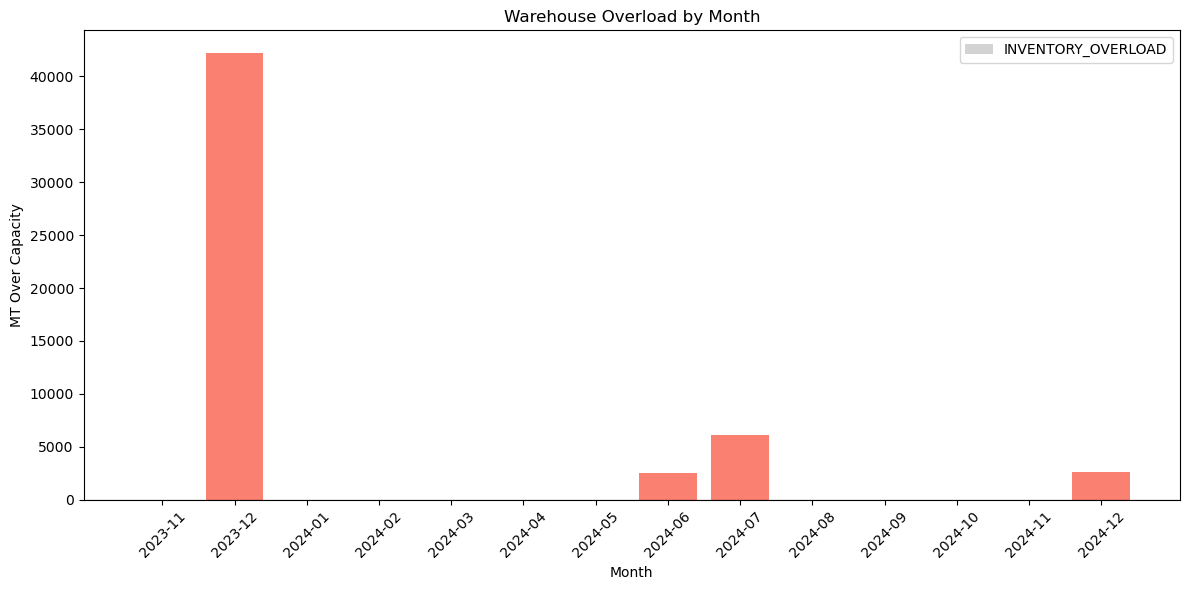

In [256]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(
    df_compare_cn['MONTH'].astype(str),
    df_compare_cn['INVENTORY_OVERLOAD'],
    color=df_compare_cn['INVENTORY_OVERLOAD'].apply(lambda x: 'salmon' if x > 0 else 'lightgray'),
    label='INVENTORY_OVERLOAD'
)

plt.axhline(0, color='black', linewidth=0.8)
plt.title("Warehouse Overload by Month")
plt.ylabel("MT Over Capacity")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

เดือน 7 เป็นเดือนที่เกินคลังมากที่สุด 

ในช่วงเวลาหนึ่งของเดือนนั้น ต้องมีของอยู่ในคลัง สูงสุดถึง inventory overload MT

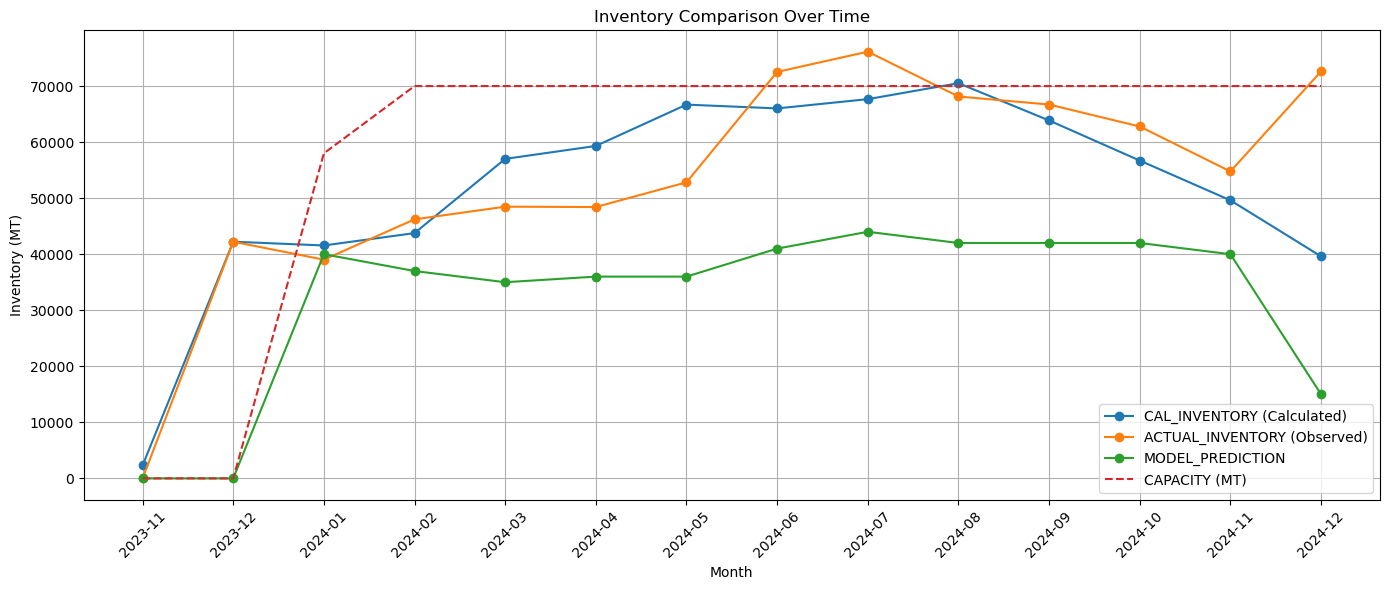

In [257]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df_compare_cn['MONTH'].astype(str), df_compare_cn['CAL_INVENTORY'], marker='o', label='CAL_INVENTORY (Calculated)')
plt.plot(df_compare_cn['MONTH'].astype(str), df_compare_cn['ACTUAL_INVENTORY'], marker='o', label='ACTUAL_INVENTORY (Observed)')
plt.plot(df_compare_cn['MONTH'].astype(str), df_compare_cn['Predicted_inventory_MT'], marker='o', label='MODEL_PREDICTION')
plt.plot(df_compare_cn['MONTH'].astype(str), df_compare_cn['Total_capacity_MT'], label='CAPACITY (MT)', linestyle='--')
plt.xticks(rotation=45)
plt.title("Inventory Comparison Over Time")
plt.xlabel("Month")
plt.ylabel("Inventory (MT)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

เกิด overflow ขึ้นที่เดือน 6, 7 และ 12


ต้องมี default capacity หรือ buffer
Inbound เกิน Outbound
คลังสะสมเรื่อย ๆ
ต้อง balance demand-supply
ค่าคำนวณ underestimate
พบของจริงมากกว่าที่คิด
ปรับ forecast โดยพิจารณา uncertainty


## Shelf life

In [201]:
material_df = pd.read_excel("clean/Cleaned_material.xlsx")
display(material_df.head())
df_inventory_cn_copy = df_inventory_cn.copy()
display(df_inventory_cn_copy.head())

,MATERIAL_NAME,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT
0,MAT-0001,P-002,3,40
1,MAT-0002,P-001,8,15
2,MAT-0003,P-004,2,35
3,MAT-0004,P-002,3,35
4,MAT-0005,P-002,5,20


,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,STOCK_SELL_VALUE,CURRENCY,UNRESTRICTED_STOCK_MT
0,2023-12-31,CHINA-WAREHOUSE,MAT-0045,SCRAP,211,CNY,0.164
1,2023-12-31,CHINA-WAREHOUSE,MAT-0117,A1342A,3312,CNY,0.350
2,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A4085A,287100,CNY,22.500
3,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A2741A,287100,CNY,22.500
4,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A8721A,287100,CNY,22.500


In [202]:
# Convert dates and extract the month
df_inventory_cn_copy["BALANCE_AS_OF_DATE"] = pd.to_datetime(df_inventory_cn_copy["BALANCE_AS_OF_DATE"])
df_inventory_cn_copy["MONTH"] = df_inventory_cn_copy["BALANCE_AS_OF_DATE"].dt.to_period("M")

# Merge shelf life into the inventory data
merged_sl = pd.merge(df_inventory_cn_copy, material_df[["MATERIAL_NAME", "SHELF_LIFE_IN_MONTH"]],
                     on="MATERIAL_NAME", how="left")

# Find the first month each batch of material was seen
first_appearance = (
    merged_sl.groupby(["MATERIAL_NAME", "BATCH_NUMBER"])["MONTH"]
    .min()
    .reset_index()
    .rename(columns={"MONTH": "FIRST_SEEN_MONTH"})
)

# Merge this back into the main dataframe
merged_sl = pd.merge(merged_sl, first_appearance, on=["MATERIAL_NAME", "BATCH_NUMBER"], how="left")

# Calculate months since first seen
merged_sl["MONTHS_SINCE_FIRST"] = (merged_sl["MONTH"] - merged_sl["FIRST_SEEN_MONTH"]).apply(lambda x: x.n)

# Calculate remaining shelf life
merged_sl["SHELF_LIFE_REMAINING"] = merged_sl["SHELF_LIFE_IN_MONTH"] - merged_sl["MONTHS_SINCE_FIRST"]

# Summarize month with most expiring items
monthly_expiring = merged_sl.groupby("MONTH")["SHELF_LIFE_REMAINING"].apply(
    lambda x: (x <= 1).sum()).reset_index(name="NUM_EXPIRING_ITEMS")

monthly_expiring.sort_values(by='NUM_EXPIRING_ITEMS', ascending=False, inplace=True)

monthly_expiring

,MONTH,NUM_EXPIRING_ITEMS
11,2024-11,698
10,2024-10,670
12,2024-12,651
9,2024-09,582
8,2024-08,551
7,2024-07,502
6,2024-06,426
5,2024-05,333
4,2024-04,301
3,2024-03,243


> เดือน 11 มีการเก็บสินค้าที่ หมดอายุเยอะมาก

In [203]:
merged_sl.head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,STOCK_SELL_VALUE,CURRENCY,UNRESTRICTED_STOCK_MT,MONTH,SHELF_LIFE_IN_MONTH,FIRST_SEEN_MONTH,MONTHS_SINCE_FIRST,SHELF_LIFE_REMAINING
0,2023-12-31,CHINA-WAREHOUSE,MAT-0045,SCRAP,211,CNY,0.164,2023-12,10,2023-12,0,10
1,2023-12-31,CHINA-WAREHOUSE,MAT-0117,A1342A,3312,CNY,0.350,2023-12,3,2023-12,0,3
2,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A4085A,287100,CNY,22.500,2023-12,3,2023-12,0,3
3,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A2741A,287100,CNY,22.500,2023-12,3,2023-12,0,3
4,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A8721A,287100,CNY,22.500,2023-12,3,2023-12,0,3


In [204]:
# เงื่อนไข 1: อายุสินค้า (shelf life) หมดแล้ว
cond_expired = merged_sl['SHELF_LIFE_REMAINING'] <= 0

# เงื่อนไข 2: มีสินค้าคงคลัง แต่ไม่มีราคาขาย และไม่มีแถวอื่นในเดือนเดียวกันที่ขายได้
# สร้าง mask สำหรับ material+batch+month ที่มีราคา ≠ 0
has_price = merged_sl[merged_sl['STOCK_SELL_VALUE'] > 0][['MATERIAL_NAME', 'BATCH_NUMBER', 'MONTH']]
has_price['has_sell_value'] = True

# merge เพื่อดูว่าแต่ละแถวมีแถวอื่นในเดือนเดียวกันที่ขายได้มั้ย
merged_with_flag = pd.merge(
    merged_sl,
    has_price,
    on=['MATERIAL_NAME', 'BATCH_NUMBER', 'MONTH'],
    how='left'
)

cond_unsellable = (
    (merged_with_flag['UNRESTRICTED_STOCK_MT'] > 0) &
    (merged_with_flag['STOCK_SELL_VALUE'] == 0) &
    (merged_with_flag['has_sell_value'].isna())
)

# เงื่อนไข 3: รหัส batch ขึ้นต้นด้วย "SCRAP"
cond_scrap = merged_sl['BATCH_NUMBER'].astype(str).str.upper().str.startswith("SCRAP")
cond_scrap = merged_sl['BATCH_NUMBER'].astype(str).str.upper().str.startswith("SCR")

# รวมทุกเงื่อนไข (อย่างน้อย 1 ข้อ)
final_condition = cond_expired | cond_unsellable | cond_scrap

# ดึงเฉพาะแถวที่เข้าเงื่อนไข
waste_items_df = merged_sl[final_condition]
waste_items_df

/var/folders/hb/q_224lns0mlcx0n865_2ylqc0000gn/T/ipykernel_78117/876125407.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  waste_items_df = merged_sl[final_condition]


,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,STOCK_SELL_VALUE,CURRENCY,UNRESTRICTED_STOCK_MT,MONTH,SHELF_LIFE_IN_MONTH,FIRST_SEEN_MONTH,MONTHS_SINCE_FIRST,SHELF_LIFE_REMAINING
0,2023-12-31,CHINA-WAREHOUSE,MAT-0045,SCRAP,211,CNY,0.164,2023-12,10,2023-12,0,10
46,2023-12-31,CHINA-WAREHOUSE,MAT-0280,SCRAP,281,CNY,0.042,2023-12,9,2023-12,0,9
131,2023-12-31,CHINA-WAREHOUSE,MAT-0014,SCRAP,67,CNY,0.025,2023-12,3,2023-12,0,3
263,2023-12-31,CHINA-WAREHOUSE,MAT-0279,SCRAP,3146,CNY,0.923,2023-12,3,2023-12,0,3
267,2023-12-31,CHINA-WAREHOUSE,MAT-0214,SCRAP,161,CNY,0.025,2023-12,6,2023-12,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
15494,2024-12-31,CHINA-WAREHOUSE,MAT-0332,4373A,93860,CNY,100.925,2024-12,6,2024-05,7,-1
15495,2024-12-31,CHINA-WAREHOUSE,MAT-0332,1155A,95232,CNY,102.400,2024-12,6,2024-05,7,-1
15496,2024-12-31,CHINA-WAREHOUSE,MAT-0332,8859A,94023,CNY,101.100,2024-12,6,2024-05,7,-1
15497,2024-12-31,CHINA-WAREHOUSE,MAT-0332,3528A,18600,CNY,20.000,2024-12,6,2024-05,7,-1


In [205]:
# Group by MONTH and sum UNRESTRICTED_STOCK_MT
monthly_waste = waste_items_df.groupby('MONTH')['UNRESTRICTED_STOCK_MT'].sum().reset_index()
monthly_waste.sort_values(by='UNRESTRICTED_STOCK_MT', ascending=False, inplace=True)
monthly_waste

,MONTH,UNRESTRICTED_STOCK_MT
11,2024-11,17737.579
12,2024-12,16482.825
10,2024-10,13611.259
9,2024-09,12940.543
7,2024-07,11606.280
8,2024-08,11127.460
6,2024-06,9349.676
5,2024-05,8227.975
4,2024-04,6805.608
1,2024-01,6097.559


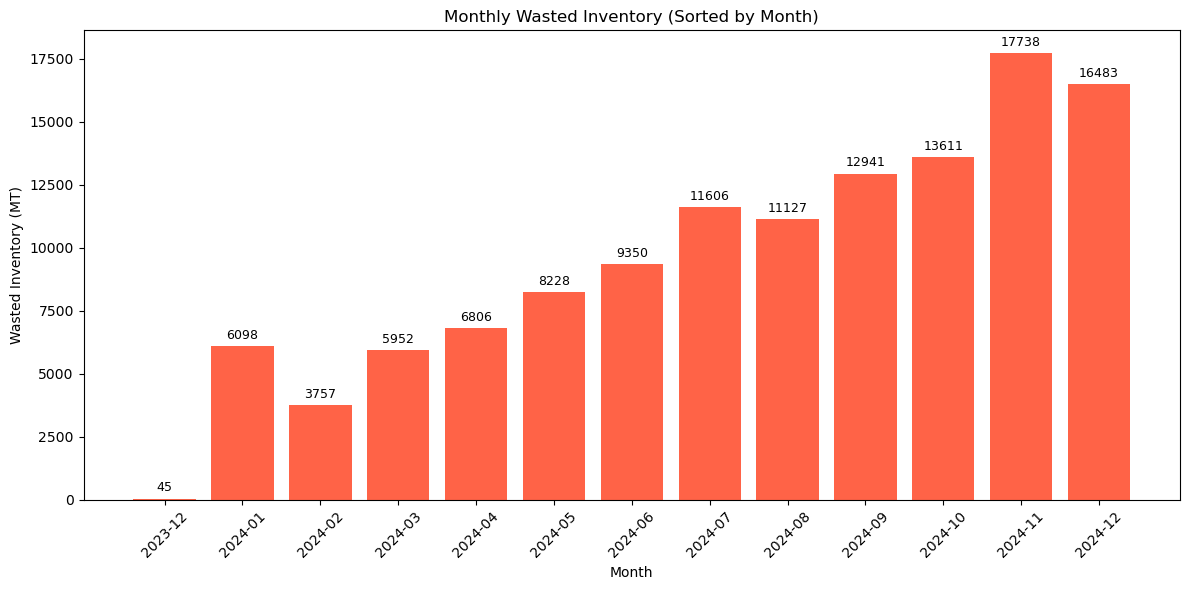

In [206]:
import matplotlib.pyplot as plt

# Ensure MONTH is sorted chronologically
monthly_waste_sorted = monthly_waste.sort_values('MONTH')

plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_waste_sorted['MONTH'].astype(str),
    monthly_waste_sorted['UNRESTRICTED_STOCK_MT'],
    color='tomato'
)
plt.title("Monthly Wasted Inventory (Sorted by Month)")
plt.xlabel("Month")
plt.ylabel("Wasted Inventory (MT)")
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate values on bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9)

plt.show()

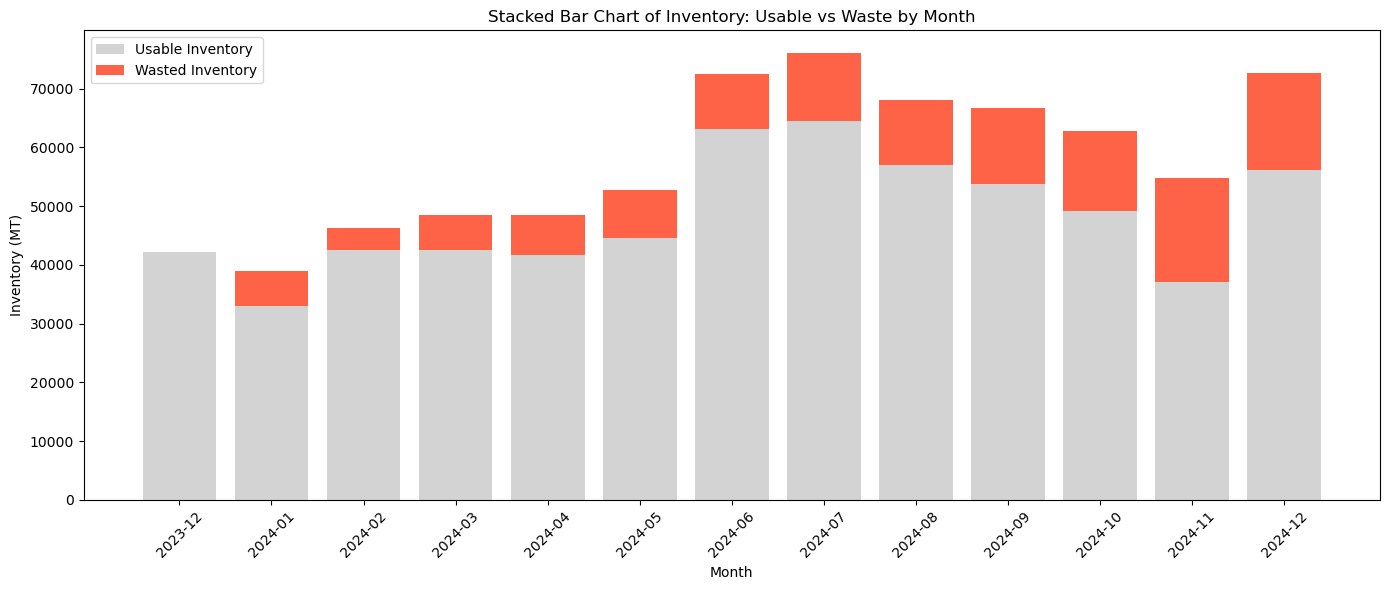

In [207]:
import matplotlib.pyplot as plt
import pandas as pd

# รวมของเสียต่อเดือน
waste_by_month = monthly_waste.copy()
waste_by_month.columns = ['MONTH', 'WASTE_MT']

# รวมสินค้าทั้งหมด (รวม waste และ usable) ต่อเดือน
total_by_month = merged_sl.groupby('MONTH')['UNRESTRICTED_STOCK_MT'].sum().reset_index()
total_by_month.columns = ['MONTH', 'TOTAL_STOCK_MT']

# รวมตารางเข้าเป็นตารางเดียว
stack_df = pd.merge(total_by_month, waste_by_month, on='MONTH', how='left')
stack_df['WASTE_MT'] = stack_df['WASTE_MT'].fillna(0)  # ถ้าไม่มี waste เดือนนั้น ให้เป็น 0
stack_df['USABLE_MT'] = stack_df['TOTAL_STOCK_MT'] - stack_df['WASTE_MT']

# วาดกราฟ
stack_df_sorted = stack_df.sort_values('MONTH')
x = stack_df_sorted['MONTH'].astype(str)

plt.figure(figsize=(14, 6))
plt.bar(x, stack_df_sorted['USABLE_MT'], label='Usable Inventory', color='lightgray')
plt.bar(x, stack_df_sorted['WASTE_MT'], bottom=stack_df_sorted['USABLE_MT'], label='Wasted Inventory', color='tomato')

plt.title("Stacked Bar Chart of Inventory: Usable vs Waste by Month")
plt.xlabel("Month")
plt.ylabel("Inventory (MT)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [208]:
merged_sl.head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,STOCK_SELL_VALUE,CURRENCY,UNRESTRICTED_STOCK_MT,MONTH,SHELF_LIFE_IN_MONTH,FIRST_SEEN_MONTH,MONTHS_SINCE_FIRST,SHELF_LIFE_REMAINING
0,2023-12-31,CHINA-WAREHOUSE,MAT-0045,SCRAP,211,CNY,0.164,2023-12,10,2023-12,0,10
1,2023-12-31,CHINA-WAREHOUSE,MAT-0117,A1342A,3312,CNY,0.350,2023-12,3,2023-12,0,3
2,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A4085A,287100,CNY,22.500,2023-12,3,2023-12,0,3
3,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A2741A,287100,CNY,22.500,2023-12,3,2023-12,0,3
4,2023-12-31,CHINA-WAREHOUSE,MAT-0281,A8721A,287100,CNY,22.500,2023-12,3,2023-12,0,3


In [209]:
import numpy as np
# Step 1: หาเดือนแรกและสุดท้ายที่พบสินค้า (batch + material)
first_seen = (
    merged_sl.groupby(["MATERIAL_NAME", "BATCH_NUMBER"])["MONTH"]
    .min()
    .reset_index()
    .rename(columns={"MONTH": "FIRST_SEEN_MONTH"})
)
last_seen = (
    merged_sl.groupby(["MATERIAL_NAME", "BATCH_NUMBER"])["MONTH"]
    .max()
    .reset_index()
    .rename(columns={"MONTH": "LAST_SEEN_MONTH"})
)

# Step 2: รวมข้อมูลเดือนเข้าออก
duration_df = pd.merge(first_seen, last_seen, on=["MATERIAL_NAME", "BATCH_NUMBER"])
duration_df["STAY_DURATION_MONTHS"] = (
    duration_df["LAST_SEEN_MONTH"] - duration_df["FIRST_SEEN_MONTH"]
).apply(lambda x: x.n)

# Step 3: รวม shelf life
shelf_life_map = merged_sl[["MATERIAL_NAME", "SHELF_LIFE_IN_MONTH"]].drop_duplicates()
duration_df = pd.merge(duration_df, shelf_life_map, on="MATERIAL_NAME", how="left")

# Step 4: กรองเฉพาะสินค้าที่ shelf life สั้น
# ดูการกระจายของ shelf life ทั้งหมด
merged_sl = duration_df
q25 = np.percentile(merged_sl['SHELF_LIFE_IN_MONTH'].dropna(), 25)
print(f"25th percentile of shelf life = {q25} months")

# กรองเฉพาะสินค้าที่ shelf life <= Q25
short_life_items = merged_sl[merged_sl['SHELF_LIFE_IN_MONTH'] <= q25].copy()

# Optional: จัดเรียงดูว่ามีสินค้าถูกปล่อยช้า/เร็วเกินอายุการใช้งานหรือไม่
short_life_items.sort_values(by="STAY_DURATION_MONTHS", ascending=False, inplace=True)
short_life_items

25th percentile of shelf life = 4.0 months


,MATERIAL_NAME,BATCH_NUMBER,FIRST_SEEN_MONTH,LAST_SEEN_MONTH,STAY_DURATION_MONTHS,SHELF_LIFE_IN_MONTH
3750,MAT-0429,V9006A,2023-12,2024-12,12,3
154,MAT-0008,V7045A,2023-12,2024-12,12,3
2120,MAT-0236,S4960B,2023-12,2024-12,12,4
2378,MAT-0279,SCRAP,2023-12,2024-12,12,3
2384,MAT-0281,A2741A,2023-12,2024-12,12,3
...,...,...,...,...,...,...
1895,MAT-0206,V9230A,2023-12,2023-12,0,4
2573,MAT-0320,M9918A,2024-12,2024-12,0,4
2572,MAT-0320,M9667A,2024-12,2024-12,0,4
2571,MAT-0320,M9557B,2024-12,2024-12,0,4


In [210]:
# Step 1: คำนวณ STAY_RATIO
short_life_items["STAY_RATIO"] = short_life_items["STAY_DURATION_MONTHS"] / short_life_items["SHELF_LIFE_IN_MONTH"]

# Step 2: สร้างช่วงการตีความ
def categorize_stay(ratio):
    if ratio < 1:
        return "Fast Release"
    elif ratio <= 1.2:
        return "On Time"
    else:
        return "Delayed"

short_life_items["RELEASE_CATEGORY"] = short_life_items["STAY_RATIO"].apply(categorize_stay)

# Step 3: นับจำนวนสินค้าตามประเภท
release_summary = short_life_items["RELEASE_CATEGORY"].value_counts().reset_index()
release_summary.columns = ["RELEASE_CATEGORY", "COUNT"]

release_summary

,RELEASE_CATEGORY,COUNT
0,Fast Release,618
1,Delayed,484
2,On Time,137


วิเคราะห์:
	•	ถ้า STAY_RATIO < 1 → ปล่อยออก ก่อนหมดอายุ (เร่งปล่อย)
	•	ถ้า STAY_RATIO ≈ 1 → ปล่อยออก ตอนใกล้หมดอายุ
	•	ถ้า STAY_RATIO > 1 → ปล่อยออก หลังหมดอายุ (ล่าช้า)

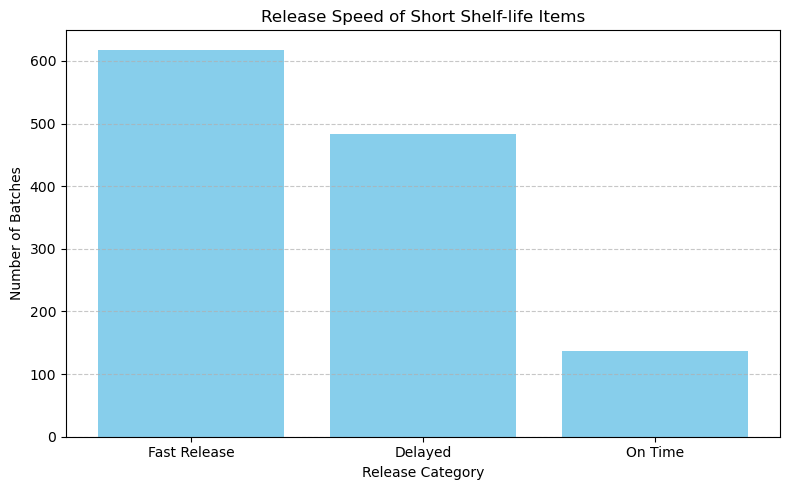

In [211]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(release_summary["RELEASE_CATEGORY"], release_summary["COUNT"], color="skyblue")
plt.title("Release Speed of Short Shelf-life Items")
plt.ylabel("Number of Batches")
plt.xlabel("Release Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 Fast Release มีจำนวนมาก → ระบบมีแนวโน้ม เร่งปล่อยสินค้าหมดอายุไวได้ดี

In [212]:
merged_sl

,MATERIAL_NAME,BATCH_NUMBER,FIRST_SEEN_MONTH,LAST_SEEN_MONTH,STAY_DURATION_MONTHS,SHELF_LIFE_IN_MONTH
0,MAT-0001,V1055A,2024-05,2024-07,2,3
1,MAT-0001,V1126A,2023-12,2024-01,1,3
2,MAT-0001,V1214A,2024-07,2024-12,5,3
3,MAT-0001,V1821A,2024-07,2024-12,5,3
4,MAT-0001,V2525A,2024-04,2024-05,1,3
...,...,...,...,...,...,...
3761,MAT-0430,5974,2024-12,2024-12,0,5
3762,MAT-0430,6940,2024-02,2024-10,8,5
3763,MAT-0430,7348,2024-07,2024-11,4,5
3764,MAT-0430,7536,2024-11,2024-12,1,5


25th percentile of shelf life = 4.0 months


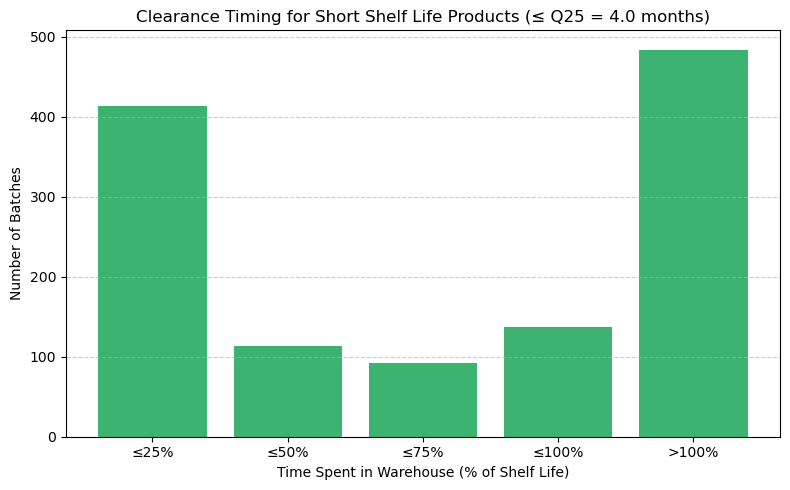

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. หาค่า 25th percentile ของ shelf life
q25 = np.percentile(merged_sl['SHELF_LIFE_IN_MONTH'].dropna(), 25)
print(f"25th percentile of shelf life = {q25:.1f} months")

# 2. กรองสินค้าที่มี shelf life ≤ Q25
short_life_items = merged_sl[merged_sl['SHELF_LIFE_IN_MONTH'] <= q25].copy()

# 3. คำนวณสัดส่วนระยะเวลาที่อยู่ในคลังเทียบกับ shelf life
short_life_items["STAY_RATIO"] = short_life_items["STAY_DURATION_MONTHS"] / short_life_items["SHELF_LIFE_IN_MONTH"]

# 4. จัดกลุ่มตามสัดส่วนเวลา
bins = [0, 0.25, 0.5, 0.75, 1.0, float("inf")]
labels = ["≤25%", "≤50%", "≤75%", "≤100%", ">100%"]
short_life_items["STAY_BIN"] = pd.cut(short_life_items["STAY_RATIO"], bins=bins, labels=labels, include_lowest=True)

# 5. นับจำนวนแต่ละกลุ่ม
distribution = short_life_items["STAY_BIN"].value_counts().sort_index()

# 6. วาดกราฟ
plt.figure(figsize=(8, 5))
plt.bar(distribution.index, distribution.values, color='mediumseagreen')
plt.title(f"Clearance Timing for Short Shelf Life Products (≤ Q25 = {q25:.1f} months)")
plt.xlabel("Time Spent in Warehouse (% of Shelf Life)")
plt.ylabel("Number of Batches")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

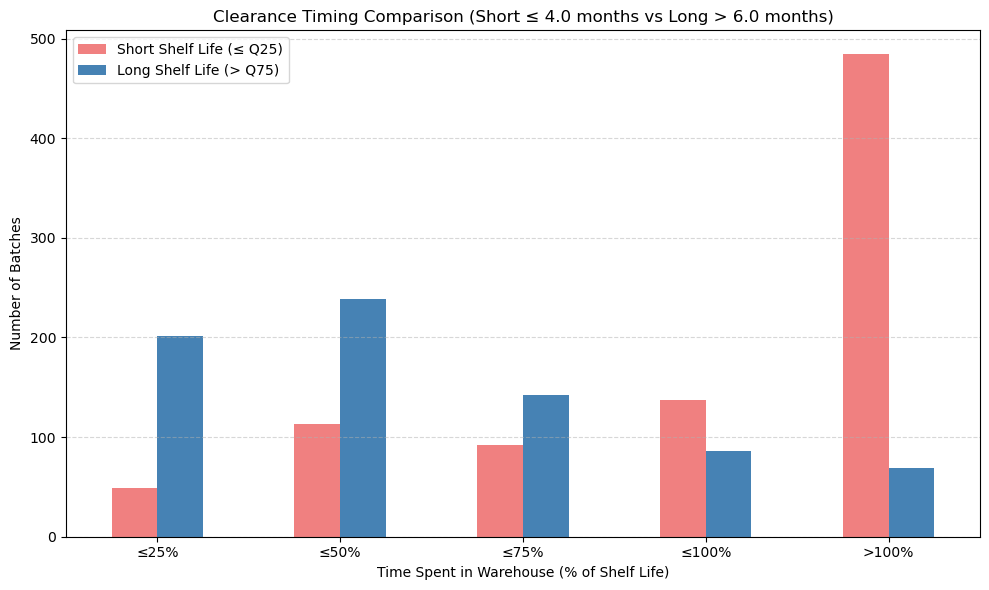

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: คำนวณ Q25 และ Q75
q25 = np.percentile(merged_sl['SHELF_LIFE_IN_MONTH'].dropna(), 25)
q75 = np.percentile(merged_sl['SHELF_LIFE_IN_MONTH'].dropna(), 75)

# Step 2: เตรียม duration_df
duration_df = merged_sl[[
    'MATERIAL_NAME', 'BATCH_NUMBER', 'FIRST_SEEN_MONTH', 
    'LAST_SEEN_MONTH', 'SHELF_LIFE_IN_MONTH'
]].drop_duplicates()

duration_df["STAY_DURATION_MONTHS"] = (
    duration_df["LAST_SEEN_MONTH"] - duration_df["FIRST_SEEN_MONTH"]
).apply(lambda x: x.n)

# Step 3: คำนวณสัดส่วนเวลาค้างเทียบ shelf life
duration_df["STAY_RATIO"] = duration_df["STAY_DURATION_MONTHS"] / duration_df["SHELF_LIFE_IN_MONTH"]

# Step 4: สร้างกลุ่มอายุสั้นและอายุยาว
short_life = duration_df[duration_df["SHELF_LIFE_IN_MONTH"] <= q25].copy()
long_life = duration_df[duration_df["SHELF_LIFE_IN_MONTH"] > q75].copy()

# Step 5: สร้าง bin เดียวกัน
bins = [0, 0.25, 0.5, 0.75, 1.0, float("inf")]
labels = ["≤25%", "≤50%", "≤75%", "≤100%", ">100%"]

short_life["STAY_BIN"] = pd.cut(short_life["STAY_RATIO"], bins=bins, labels=labels)
long_life["STAY_BIN"] = pd.cut(long_life["STAY_RATIO"], bins=bins, labels=labels)

# Step 6: รวมผลลัพธ์เป็น DataFrame เดียวกัน
short_count = short_life["STAY_BIN"].value_counts().sort_index()
long_count = long_life["STAY_BIN"].value_counts().sort_index()

comparison_df = pd.DataFrame({
    "Short Shelf Life (≤ Q25)": short_count,
    "Long Shelf Life (> Q75)": long_count
}).fillna(0)

# Step 7: วาดกราฟเปรียบเทียบ
comparison_df.plot(kind="bar", figsize=(10,6), color=["lightcoral", "steelblue"])
plt.title(f"Clearance Timing Comparison (Short ≤ {q25:.1f} months vs Long > {q75:.1f} months)")
plt.xlabel("Time Spent in Warehouse (% of Shelf Life)")
plt.ylabel("Number of Batches")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

เปรียบเทียบว่า สินค้าที่อายุสั้น มีแนวโน้มถูกปล่อยออกได้เร็วแค่ไหน (≤25%, ≤50% ฯลฯ) เทียบกับ สินค้าที่อายุยาว
	•	ถ้าเห็นว่า Short Shelf Life มี bar สูงมากในกลุ่ม >100% → แปลว่าเรายังปล่อยสินค้าอายุสั้นไม่ทันเวลา (เสี่ยงเสีย)
	•	ถ้า Short Shelf Life มี bar สูงใน ≤25% หรือ ≤50% → แปลว่า ระบบมีการเร่งระบาย ได้ดี

	•	มี “ความล้มเหลวในการจัดการกลุ่มสินค้าอายุสั้น” อย่างชัดเจน
→ ควรมีระบบเร่งขาย, แจ้งเตือน, วางแผนโปรโมชัน, การเติมสินค้าที่มี shelf life สั้นเข้าไปในช่องทางที่หมุนเวียนเร็ว (fast-moving)
	•	การจัดการสินค้าที่อายุยาวยังดูดี แต่ต้องระวังการสะสม stock ที่ไม่จำเป็น

เราเร่งระบายของออกไม่ดี

/var/folders/hb/q_224lns0mlcx0n865_2ylqc0000gn/T/ipykernel_78117/2021004317.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_life_items["STAY_BIN"] = pd.cut(short_life_items["STAY_RATIO"], bins=bins, labels=labels, include_lowest=True)


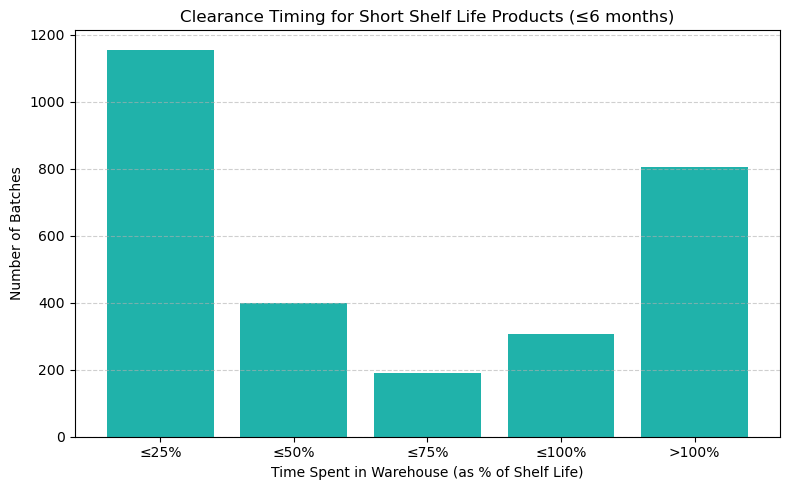

In [ ]:
# ตรวจสอบระยะเวลาที่ batch-material แต่ละตัว "อยู่ในคลัง"
first_seen = (
    merged_sl.groupby(["MATERIAL_NAME", "BATCH_NUMBER"])["MONTH"]
    .min()
    .reset_index()
    .rename(columns={"MONTH": "FIRST_SEEN_MONTH"})
)

last_seen = (
    merged_sl.groupby(["MATERIAL_NAME", "BATCH_NUMBER"])["MONTH"]
    .max()
    .reset_index()
    .rename(columns={"MONTH": "LAST_SEEN_MONTH"})
)

# คำนวณระยะเวลาที่สินค้าค้างในคลัง
duration_df = pd.merge(first_seen, last_seen, on=["MATERIAL_NAME", "BATCH_NUMBER"])
duration_df["STAY_DURATION"] = (duration_df["LAST_SEEN_MONTH"] - duration_df["FIRST_SEEN_MONTH"]).apply(lambda x: x.n)

# ดึง shelf life
shelf_life_df = merged_sl[["MATERIAL_NAME", "SHELF_LIFE_IN_MONTH"]].drop_duplicates()
duration_df = pd.merge(duration_df, shelf_life_df, on="MATERIAL_NAME", how="left")

# คำนวณสัดส่วนการค้างในคลังเทียบกับ shelf life
duration_df["STAY_RATIO"] = duration_df["STAY_DURATION"] / duration_df["SHELF_LIFE_IN_MONTH"]

# กรองเฉพาะสินค้าที่อายุสั้น (<= 6 เดือน)
short_life_items = duration_df[duration_df["SHELF_LIFE_IN_MONTH"] <= 6]

# สรุปประสิทธิภาพการปล่อยออกไว
bins = [0, 0.25, 0.5, 0.75, 1.0, float("inf")]
labels = ["≤25%", "≤50%", "≤75%", "≤100%", ">100%"]
short_life_items["STAY_BIN"] = pd.cut(short_life_items["STAY_RATIO"], bins=bins, labels=labels, include_lowest=True)

# นับจำนวนในแต่ละกลุ่ม
distribution = short_life_items["STAY_BIN"].value_counts().sort_index()

# วาดกราฟ
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(distribution.index, distribution.values, color='lightseagreen')
plt.title("Clearance Timing for Short Shelf Life Products (≤6 months)")
plt.xlabel("Time Spent in Warehouse (as % of Shelf Life)")
plt.ylabel("Number of Batches")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Appendix

In [ ]:
#monthly_inventory['BALANCE_AS_OF_DATE'] = monthly_inventory['BALANCE_AS_OF_DATE'].dt.to_timestamp()

# รวมตารางเข้าด้วยกันใหม่
df_combined = pd.merge(monthly_stock_cn, monthly_inbound_cn, left_on='BALANCE_AS_OF_DATE', right_on='INBOUND_DATE', how='left')
df_combined = pd.merge(df_combined, monthly_outbound_cn, left_on='BALANCE_AS_OF_DATE', right_on='OUTBOUND_DATE', how='left')
df_combined.rename(columns={
    'BALANCE_AS_OF_DATE': 'MONTH-YEAR',
    'UNRESTRICTED_STOCK_MT': 'ACTUAL_INVENTORY',
    'NET_QUANTITY_MT_x': 'INBOUND',
    'NET_QUANTITY_MT_y': 'OUTBOUND'
}, inplace=True)
df_combined.drop(columns=['INBOUND_DATE', 'OUTBOUND_DATE'], inplace=True)

# คำนวณ Forecasted Inventory โดยใช้สูตร I[i] = I[i-1] + In[i] - Out[i]
df_combined['FORECAST_INVENTORY'] = 0.0
df_combined.loc[0, 'FORECAST_INVENTORY'] = df_combined.loc[0, 'ACTUAL_INVENTORY']
for i in range(1, len(df_combined)):
    df_combined.loc[i, 'FORECAST_INVENTORY'] = (
        df_combined.loc[i-1, 'FORECAST_INVENTORY'] +
        df_combined.loc[i, 'INBOUND'] -
        df_combined.loc[i, 'OUTBOUND']
    )

# คำนวณค่าความแตกต่าง
df_combined['INVENTORY_DIFF'] = df_combined['ACTUAL_INVENTORY'] - df_combined['FORECAST_INVENTORY']
df_combined

,MONTH-YEAR,ACTUAL_INVENTORY,INBOUND,OUTBOUND,FORECAST_INVENTORY,INVENTORY_DIFF
0,2023-12,42230.173,12867.525,NaN,42230.173,0.000
1,2024-01,39023.693,25025.125,25687.77,41567.528,-2543.835
2,2024-02,46217.648,16469.113,14025.65,44010.991,2206.657
3,2024-03,48478.708,33598.812,20438.56,57171.243,-8692.535
4,2024-04,48415.015,23836.500,21062.60,59945.143,-11530.128
5,2024-05,52826.486,29770.405,22762.81,66952.738,-14126.252
6,2024-06,72524.391,20254.925,21010.19,66197.473,6326.918
7,2024-07,76136.124,23471.777,21824.08,67845.170,8290.954
8,2024-08,68138.683,23469.684,20744.91,70569.944,-2431.261
9,2024-09,66701.368,19945.650,26569.43,63946.164,2755.204


จากการเปรียบเทียบค่าจริงที่เกิดขึ้นเป็นไปได้มากว่า inventory น่าจะผิดพลาด เลยมาดูเป็น material & batch แต่ละอันดีกว่า

In [ ]:
# แปลงชื่อคอลัมน์วันที่ให้เหมือนกัน
df_inbound_cn.rename(columns={'INBOUND_DATE': 'DATE'}, inplace=True)
df_outbound_cn.rename(columns={'OUTBOUND_DATE': 'DATE'}, inplace=True)
df_inventory_cn.rename(columns={'BALANCE_AS_OF_DATE': 'DATE'}, inplace=True)

# แปลงวันที่เป็น datetime และใช้เฉพาะเดือน/ปี
df_inbound_cn['DATE'] = pd.to_datetime(df_inbound_cn['DATE']).dt.to_period('M').dt.to_timestamp()
df_outbound_cn['DATE'] = pd.to_datetime(df_outbound_cn['DATE']).dt.to_period('M').dt.to_timestamp()
df_inventory_cn['DATE'] = pd.to_datetime(df_inventory_cn['DATE']).dt.to_period('M').dt.to_timestamp()

# สรุปข้อมูลรายเดือนต่อ MATERIAL_NAME
inbound_summary = (
    df_inbound_cn.groupby(['MATERIAL_NAME', 'DATE'])['NET_QUANTITY_MT']
    .sum().reset_index().rename(columns={'NET_QUANTITY_MT': 'INBOUND_MT'})
)

outbound_summary = (
    df_outbound_cn.groupby(['MATERIAL_NAME', 'DATE'])['NET_QUANTITY_MT']
    .sum().reset_index().rename(columns={'NET_QUANTITY_MT': 'OUTBOUND_MT'})
)

inventory_summary = (
    df_inventory_cn.groupby(['MATERIAL_NAME', 'DATE'])['UNRESTRICTED_STOCK_MT']
    .sum().reset_index()
)

# รวมข้อมูลเข้าด้วยกัน
material_flow = pd.merge(inventory_summary, inbound_summary, on=['MATERIAL_NAME', 'DATE'], how='outer')
material_flow = pd.merge(material_flow, outbound_summary, on=['MATERIAL_NAME', 'DATE'], how='outer')

# เติมค่า missing เป็น 0
material_flow.fillna(0, inplace=True)
material_flow

/var/folders/hb/q_224lns0mlcx0n865_2ylqc0000gn/T/ipykernel_76580/3569849438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inventory_cn.rename(columns={'BALANCE_AS_OF_DATE': 'DATE'}, inplace=True)
/var/folders/hb/q_224lns0mlcx0n865_2ylqc0000gn/T/ipykernel_76580/3569849438.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inventory_cn['DATE'] = pd.to_datetime(df_inventory_cn['DATE']).dt.to_period('M').dt.to_timestamp()


,MATERIAL_NAME,DATE,UNRESTRICTED_STOCK_MT,INBOUND_MT,OUTBOUND_MT
0,MAT-0001,2023-12-01,1927.525,0.000,0.00
1,MAT-0001,2024-01-01,2225.625,1708.500,1409.81
2,MAT-0001,2024-02-01,1843.725,0.000,381.87
3,MAT-0001,2024-03-01,1393.300,739.500,679.79
4,MAT-0001,2024-04-01,1328.500,255.000,834.10
...,...,...,...,...,...
2982,MAT-0430,2024-08-01,65.375,0.000,1.68
2983,MAT-0430,2024-09-01,60.900,4.125,4.48
2984,MAT-0430,2024-10-01,60.550,271.850,0.36
2985,MAT-0430,2024-11-01,58.450,0.000,80.27
